In [16]:
 # Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [45]:
# Load .env enviroment variables
load_dotenv()

True

In [46]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

#create alpacca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

# Part 1: Personal Finance Planner

In [47]:
# Set monthly household income
monthly_income = 12000

In [48]:
#collect crypto prices using requests library
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"


In [49]:
# Fetch current BTC price
# Execute `GET` request with url
response_data = requests.get(btc_url)

# Store response using `content` attribute
response_content = response_data.content

# Format data as JSON
data = response_data.json()

# Use json.dumps with argument indent=4 to format data
print(json.dumps(data, indent=4))



{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18492906,
            "total_supply": 18492906,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 10930.99,
                    "volume_24h": 21672721059,
                    "market_cap": 202031021573,
                    "percentage_change_1h": 0.17862379434894,
                    "percentage_change_24h": 0.0902755311800192,
                    "percentage_change_7d": 5.69345069558719,
                    "percent_change_1h": 0.17862379434894,
                    "percent_change_24h": 0.0902755311800192,
                    "percent_change_7d": 5.69345069558719
                }
            },
            "last_updated": 1600409400
        }
    },
    "metadata": {
        "timestamp": 1600409400,
        "num_cryp

In [50]:
#store price of bit coin in a variable
btc_price = data['data']['1']['quotes']['USD']['price']
print(btc_price)

10930.99


In [51]:
# Fetch current ETH price
# Execute `GET` request with url
response_data2 = requests.get(eth_url)

# Store response using `content` attribute
response_content2 = response_data2.content

# Format data as JSON
data2 = response_data2.json()

# Use json.dumps with argument indent=4 to format data
print(json.dumps(data2, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 112648952,
            "total_supply": 112648952,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 385.45,
                    "volume_24h": 14864332484,
                    "market_cap": 43351396965,
                    "percentage_change_1h": 0.519539404626516,
                    "percentage_change_24h": 1.32715177037031,
                    "percentage_change_7d": 4.84485862052859,
                    "percent_change_1h": 0.519539404626516,
                    "percent_change_24h": 1.32715177037031,
                    "percent_change_7d": 4.84485862052859
                }
            },
            "last_updated": 1600409380
        }
    },
    "metadata": {
        "timestamp": 1600409380,
        "num_crypto

In [52]:
#store price of bit coin in a variable
eth_price = data2['data']['1027']['quotes']['USD']['price']
print(eth_price)

385.45


In [53]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

In [54]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13117.19
The current value of your 5.3 ETH is $2042.88


### Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [55]:
 # Current amount of shares
my_agg = 200
my_spy = 50

In [56]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2020-09-16", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-09-16", tz="America/New_York").isoformat()

# Set the stock tickers
tickers = ["AGG", "SPY"]

# Get 1 year's worth of historical data for all stocks
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df

# Display sample data
df_ticker

AGG                                     SPY  \
                             open    high    low   close   volume    open   
time                                                                        
2020-09-16 00:00:00-04:00  118.53  118.53  118.2  118.32  5190572  341.51   

                                                             
                             high     low   close    volume  
time                                                         
2020-09-16 00:00:00-04:00  343.06  338.52  338.81  70521698

In [57]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]["close"]
    
# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices

,AGG,SPY
2020-09-16,118.32,338.81


In [58]:
agg_close_price = df_closing_prices.iloc[0]['AGG']
spy_close_price = df_closing_prices.iloc[0]['SPY']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.32
Current SPY closing price: $338.81


In [59]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16940.50
The current value of your 200 AGG shares is $23664.00


### Savings health analysis

In [60]:
# Create and empty DataFrame for savings with indexes and column names
df_savings = pd.DataFrame(index=['crypto','shares'], columns=['amount'])

#calculate cell values for dataframe
crypto_val = my_btc_value + my_eth_value
shares_val = my_spy_value + my_agg_value

#assign the values of cells
df_savings.iloc[0]['amount'] = crypto_val
df_savings.iloc[1]['amount'] = shares_val

#print the data frame
df_savings

,amount
crypto,15160.1
shares,40604.5


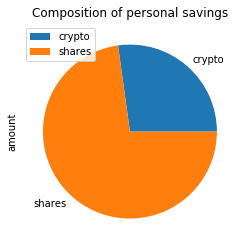

In [61]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title="Composition of personal savings");
    

In [62]:
 # Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_val + shares_val

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations in reaching the finance goal!")
else:
    print(f"Alas! not enough emergency fund, savings deficit is: ${emergency_fund} - {total_savings}")

Congratulations! You have enough money in your emergency fund.


# Part 2 : Retirement Planning

In [63]:
#Monte Carlo Simulation

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2015-09-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-09-16', tz='America/New_York').isoformat()

# Get 5 years' worth of historical data for SPY and AGG
# Set the ticker information
tickers = ["SPY","AGG"]

# Get 5 year's worth of historical price data
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head() 

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2015-09-16 00:00:00-04:00  108.59  108.66  108.41  108.510  1590491.0  198.82   
2015-09-17 00:00:00-04:00  108.48  109.19  108.40  109.170  1786153.0  200.02   
2015-09-18 00:00:00-04:00  109.26  109.39  109.15  109.295  4164336.0  195.70   
2015-09-21 00:00:00-04:00  109.17  109.17  108.88  108.980  2223683.0  196.44   
2015-09-22 00:00:00-04:00  109.19  109.39  109.12  109.270  1937125.0  193.88   

                                                              
                             high     low   close     volume  
time                                                          
2015-09-16 00:00:00-04:00  200.41  198.41  200.19   73928661  
2015-09-17 00:00:00-04:00  202.89  199.28  199.76  193997461  
2015-09-18 00:00:00-04:00  197.56  194.96  195.42  145482216  
2015-09-21 00:00:00-04:00  197.68  195.21  196.46   82723303  
2015-09-22 00:00:00-04:00  194.46  192.56  193.88  105035035

In [67]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [68]:
# Print the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2015-09-16 00:00:00-04:00  108.59  108.66  108.41  108.510  1590491.0   
2015-09-17 00:00:00-04:00  108.48  109.19  108.40  109.170  1786153.0   
2015-09-18 00:00:00-04:00  109.26  109.39  109.15  109.295  4164336.0   
2015-09-21 00:00:00-04:00  109.17  109.17  108.88  108.980  2223683.0   
2015-09-22 00:00:00-04:00  109.19  109.39  109.12  109.270  1937125.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-09-16 00:00:00-04:00          NaN  198.82  200.41  198.41  200.19   
2015-09-17 00:00:00-04:00     0.006082  200.02  202.89  199.28  199.76   
2015-09-18 00:00:00-04:00     0.001145  195.70  197.56  194.96  195.42   
2015-09-21 00:00:00-04:00    -0.002882  196.44  197.68  195.21  196.46   
2015-09-22 00:00:00-04:00     0.002661  193.88  194.46  192.56  193.88   

                                                   
                              volume daily_return  
time                                               
2015-09-16 00:00:00-04:00   73928661          NaN  
2015-09-17 00:00:00-04:00  193997461    -0.002148  
2015-09-18 00:00:00-04:00  145482216    -0.021726  
2015-09-21 00:00:00-04:00   82723303     0.005322  
2015-09-22 00:00:00-04:00  105035035    -0.013132

In [69]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991110,0.997065,0.993981,1.008849,1.005027,1.003206,0.989464,0.990718,0.996769,0.998332,...,0.993356,1.001862,1.004133,0.991394,0.996331,0.992683,0.992393,1.004163,0.996444,0.996065
2,0.997456,0.987636,1.000814,1.009877,0.994749,1.000712,0.984399,0.994862,0.998953,1.008638,...,0.996995,1.003783,1.007733,0.990989,0.990097,0.994603,0.998376,1.006833,0.995517,0.995730
3,0.994818,0.988436,1.002010,1.007826,0.992949,0.996109,0.982668,0.993403,0.988376,1.014787,...,0.998848,1.009024,1.002026,0.995111,0.998728,0.997168,0.993372,1.007827,0.988163,1.003080
4,0.996501,0.991764,1.011203,1.001067,0.987204,0.987276,0.985074,0.993750,0.994586,1.022938,...,0.998452,1.015410,1.000362,1.000570,0.994997,0.992827,0.990026,1.006505,0.995683,1.003750
5,0.986892,0.982297,1.008053,1.006068,0.986263,0.983074,0.987790,0.987989,0.988859,1.011404,...,0.994946,1.011583,1.000611,0.997844,0.996446,0.995402,0.995718,0.998475,0.993081,1.002981
6,0.986043,0.978652,1.006786,1.000748,0.983013,0.986447,0.977417,0.983828,0.984058,1.003998,...,0.992187,1.015891,1.001132,0.996879,0.996409,0.991825,1.003625,0.994038,1.002575,1.005419
7,0.997012,0.975803,1.005887,0.994920,0.990998,0.985016,0.976329,0.979187,0.981822,0.997711,...,0.996648,1.014695,1.003500,0.998573,0.995139,0.995476,1.002835,0.998382,0.988171,1.005319
8,0.990508,0.991166,1.007580,1.004912,0.994233,0.977163,0.977561,0.985446,0.981150,0.988704,...,0.998592,1.019710,1.003879,1.002116,0.996322,0.991618,1.001158,1.007643,0.989303,0.991656
9,0.986386,0.985317,1.011210,1.002393,0.996196,0.979833,0.987618,0.982880,0.979173,0.984649,...,0.995847,1.023109,1.001679,1.004023,0.998021,0.989824,1.002211,1.014633,0.993622,0.992544


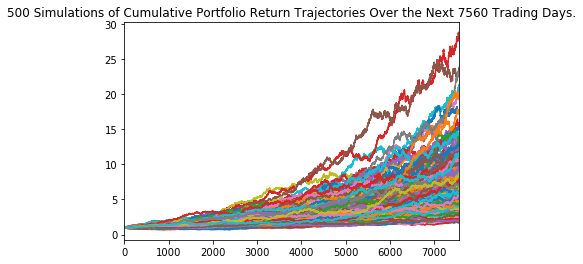

In [70]:
 # Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

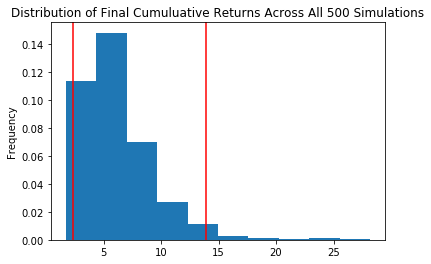

In [71]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [90]:
 # Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.366273
std               0.245490
min               0.787374
25%               1.198455
50%               1.340478
75%               1.532872
max               2.111936
95% CI Lower      0.941572
95% CI Upper      1.891280
Name: 1260, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [91]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $18831.43 and $37825.6


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [92]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000 * 1.5,2)
ci_upper = round(tbl[9]*20000 * 1.5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $28247.15 and $56738.41


# Optional Challenge - Early Retirement

In [93]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [94]:
# Print the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2015-09-16 00:00:00-04:00  108.59  108.66  108.41  108.510  1590491.0   
2015-09-17 00:00:00-04:00  108.48  109.19  108.40  109.170  1786153.0   
2015-09-18 00:00:00-04:00  109.26  109.39  109.15  109.295  4164336.0   
2015-09-21 00:00:00-04:00  109.17  109.17  108.88  108.980  2223683.0   
2015-09-22 00:00:00-04:00  109.19  109.39  109.12  109.270  1937125.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-09-16 00:00:00-04:00          NaN  198.82  200.41  198.41  200.19   
2015-09-17 00:00:00-04:00     0.006082  200.02  202.89  199.28  199.76   
2015-09-18 00:00:00-04:00     0.001145  195.70  197.56  194.96  195.42   
2015-09-21 00:00:00-04:00    -0.002882  196.44  197.68  195.21  196.46   
2015-09-22 00:00:00-04:00     0.002661  193.88  194.46  192.56  193.88   

                                                   
                              volume daily_return  
time                                               
2015-09-16 00:00:00-04:00   73928661          NaN  
2015-09-17 00:00:00-04:00  193997461    -0.002148  
2015-09-18 00:00:00-04:00  145482216    -0.021726  
2015-09-21 00:00:00-04:00   82723303     0.005322  
2015-09-22 00:00:00-04:00  105035035    -0.013132

In [95]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003036,0.993342,0.995670,1.000479,0.996056,1.003010,1.001314,0.998487,1.003161,0.998014,...,0.995701,0.992451,1.000392,1.012000,0.993996,0.995670,1.002605,0.999405,0.998978,1.005620
2,1.011491,0.995610,0.993298,0.994780,0.994921,1.005872,0.999330,1.005716,1.000859,1.001615,...,0.991666,0.992474,0.997023,1.011569,0.982977,0.999059,1.009695,0.995259,0.988522,1.005764
3,1.015774,0.991680,0.994477,1.000834,0.991880,1.006836,1.000118,1.009505,1.004278,0.998874,...,0.995118,1.001635,1.004024,1.009922,0.977113,0.992927,1.003756,1.003887,0.989030,1.010224
4,1.012979,0.994396,0.999675,0.997036,0.989959,1.001043,0.995185,1.013226,1.003330,0.995195,...,0.996403,1.013359,1.003058,1.019190,0.976455,0.985235,0.996212,1.003111,0.984656,1.006957
5,1.019597,0.988576,0.988884,1.001158,0.996974,1.002853,0.989624,1.017337,1.002659,0.996193,...,1.000603,1.011964,0.998099,1.021998,0.974851,0.981879,0.992555,1.003737,0.979853,1.012545
6,1.021411,0.994745,0.995412,0.999331,1.000267,1.011147,0.987777,1.018785,1.003222,0.994018,...,1.000953,1.011842,0.999997,1.019291,0.983128,0.970108,0.992992,1.008658,0.979421,1.007761
7,1.020769,1.001150,1.000608,1.009116,1.008956,1.007838,0.994864,1.024143,1.005621,1.003774,...,1.008004,1.017177,0.995617,1.016397,0.981575,0.961501,0.988624,1.006100,0.976875,1.002278
8,1.011655,1.004704,0.997907,1.017266,1.005647,1.004808,0.998577,1.020625,1.003063,0.998857,...,1.000819,1.016298,0.994662,1.015999,0.983023,0.971232,0.986474,1.008329,0.969795,1.004851
9,1.008035,1.012125,0.994689,1.020667,1.011944,0.999293,1.009013,1.026438,1.000194,1.001850,...,1.006648,1.017701,0.995576,1.011325,0.978297,0.979274,0.982328,1.012649,0.969389,1.001644


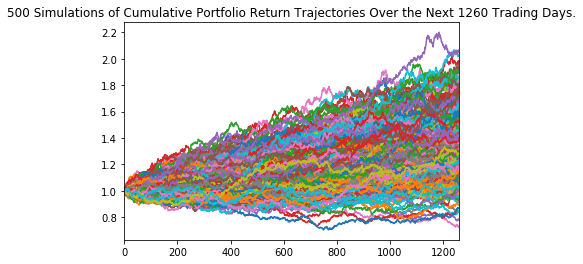

In [96]:
 # Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

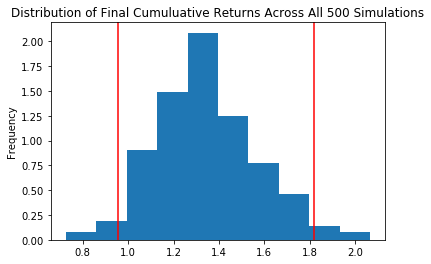

In [97]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [98]:
 # Fetch summary statistics from the Monte Carlo simulation results
five_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(five_tbl)

count           500.000000
mean              1.346055
std               0.219211
min               0.725388
25%               1.199173
50%               1.321928
75%               1.479743
max               2.066119
95% CI Lower      0.956842
95% CI Upper      1.820266
Name: 1260, dtype: float64


In [99]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(five_tbl[8]*60000,2)
ci_upper_five = round(five_tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57410.52 and $109215.97


#Ten years retirement plan

In [127]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5,.5],
    num_simulation = 1000,
    num_trading_days = 252*10
)

In [128]:
# Print the simulation input data
MC_even_dist.portfolio_data.head()# Print the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
2015-09-16 00:00:00-04:00  108.59  108.66  108.41  108.510  1590491.0   
2015-09-17 00:00:00-04:00  108.48  109.19  108.40  109.170  1786153.0   
2015-09-18 00:00:00-04:00  109.26  109.39  109.15  109.295  4164336.0   
2015-09-21 00:00:00-04:00  109.17  109.17  108.88  108.980  2223683.0   
2015-09-22 00:00:00-04:00  109.19  109.39  109.12  109.270  1937125.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-09-16 00:00:00-04:00          NaN  198.82  200.41  198.41  200.19   
2015-09-17 00:00:00-04:00     0.006082  200.02  202.89  199.28  199.76   
2015-09-18 00:00:00-04:00     0.001145  195.70  197.56  194.96  195.42   
2015-09-21 00:00:00-04:00    -0.002882  196.44  197.68  195.21  196.46   
2015-09-22 00:00:00-04:00     0.002661  193.88  194.46  192.56  193.88   

                                                   
                              volume daily_return  
2015-09-16 00:00:00-04:00   73928661          NaN  
2015-09-17 00:00:00-04:00  193997461    -0.002148  
2015-09-18 00:00:00-04:00  145482216    -0.021726  
2015-09-21 00:00:00-04:00   82723303     0.005322  
2015-09-22 00:00:00-04:00  105035035    -0.013132

In [129]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993586,0.997817,1.004208,1.003048,0.999769,0.993850,1.003881,1.000689,1.008328,1.001664,...,0.980424,1.007888,0.995802,1.014689,1.002830,0.995814,0.991636,1.000166,1.001354,1.000710
2,0.995616,0.999029,0.988109,0.995219,1.005326,0.987353,0.992219,1.002816,1.013243,1.003318,...,0.978564,1.009226,0.993086,1.008305,1.006969,0.989289,0.990873,1.002781,1.000539,1.005112
3,0.994444,1.002844,0.999434,1.009361,1.008681,0.992111,1.000193,0.987881,1.010578,0.996690,...,0.980154,0.997409,0.991089,1.011483,1.014900,0.985008,0.985508,1.001778,1.002260,1.020699
4,0.987119,1.014822,0.993393,1.011150,1.016744,0.993533,0.994831,0.997006,1.020003,0.995102,...,0.977126,0.990403,0.994491,1.001579,1.010038,0.989453,0.986354,1.002259,0.992671,1.021378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.285774,1.405749,1.637239,1.748885,3.286862,1.086598,3.370667,2.357833,1.596351,2.353430,...,1.736316,2.160034,1.097999,1.931059,1.352840,2.022761,2.427558,2.453910,1.791228,4.085397
2517,1.293071,1.418193,1.635676,1.745546,3.296337,1.085247,3.369157,2.365343,1.588209,2.384083,...,1.747620,2.128354,1.095731,1.933156,1.359221,2.010344,2.406289,2.463891,1.801431,4.038206
2518,1.285357,1.409090,1.638506,1.739471,3.314557,1.072517,3.391621,2.342851,1.615950,2.404813,...,1.759898,2.151224,1.105139,1.954732,1.371753,1.991421,2.390837,2.457775,1.801027,4.048748
2519,1.274678,1.399771,1.645736,1.738731,3.294636,1.076088,3.377241,2.353195,1.636602,2.429239,...,1.777448,2.141103,1.104344,1.949697,1.374175,2.002133,2.385151,2.473991,1.793622,4.088767


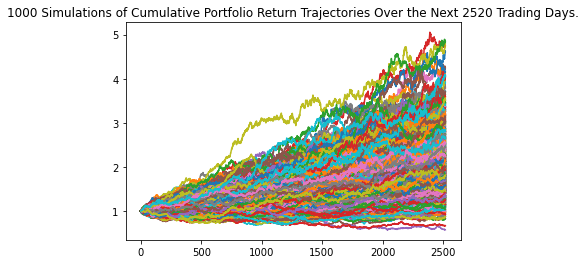

In [130]:
 # Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

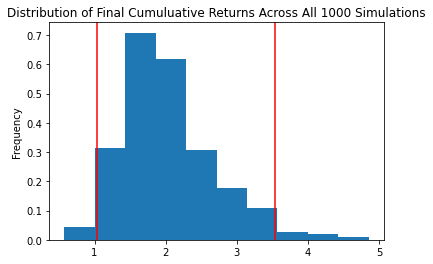

In [131]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [132]:
 # Fetch summary statistics from the Monte Carlo simulation results
ten_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(ten_tbl)

count           1000.000000
mean               2.028438
std                0.655703
min                0.575698
25%                1.562105
50%                1.912931
75%                2.373844
max                4.852999
95% CI Lower       1.041479
95% CI Upper       3.540546
Name: 2520, dtype: float64


In [133]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_ten = round(ten_tbl[8]*60000,2)
ci_upper_ten = round(ten_tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $62488.74 and $212432.75
